In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import importlib
warnings.filterwarnings('ignore')

In [2]:
import analysis.data.dataframe_creation as dataframe_creation
importlib.reload(dataframe_creation)
from analysis.data.dataframe_creation import pipeline
sd = "2018-01-01"
ed = "2024-01-01"
dataset = pipeline(sd, ed)

[*********************100%***********************]  1 of 1 completed
[                       0%                       ]

Total number of tickers 502


[*********************100%***********************]  502 of 502 completed

5 Failed downloads:
['SW', 'SOLV', 'GEV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2018-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1514782800, endDate = 1704085200")')
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2018-01-01 -> 2024-01-01)')



Null values: False
NaN values: False

Creating features
The dataset has 485 assets
The dataset has 16 predictors:
Ticker
Yavg_return
Yavg_volatility
beta
mkt_corr
Davg_span
Davg_volume
D_eSkewness
D_eVaR
D_eCVaR
D_eCurtosis
Sharpe_ratio
totalEsg
environmentScore
socialScore
governanceScore
industry


Dataset creation finished



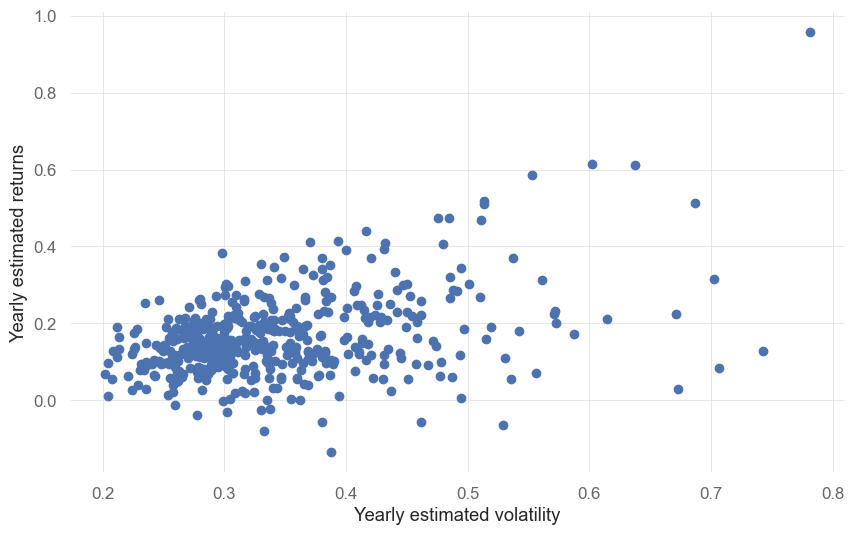

In [4]:
plt.scatter(dataset["Yavg_volatility"], dataset["Yavg_return"])
plt.xlabel("Yearly estimated volatility")
plt.ylabel("Yearly estimated returns")
plt.show()

In [3]:
outliers = outliers = dataset[
    (dataset["Yavg_return"] > 0.8)]["Ticker"].unique()
final_dataframe = dataset[~dataset["Ticker"].isin(outliers)]
final_dataframe.head()

,Ticker,Yavg_return,Yavg_volatility,beta,mkt_corr,Davg_span,Davg_volume,D_eSkewness,D_eVaR,D_eCVaR,D_eCurtosis,Sharpe_ratio,totalEsg,environmentScore,socialScore,governanceScore,industry
0,A,0.170254,0.290317,1.006775,0.707046,2.268208,1.961764e+06,-0.134994,-0.000283,-0.000401,4.334481,0.517552,11.36,1.19,6.23,3.93,Life Sciences Tools and Services
1,AAPL,0.309906,0.316770,1.238242,0.796984,2.378506,1.073273e+08,-0.036491,-0.000292,-0.000426,4.924361,0.915194,16.79,0.55,7.52,8.72,Technology
2,ABBV,0.159055,0.273195,0.657253,0.490510,2.003774,7.196053e+06,-0.845037,-0.000286,-0.000483,13.941117,0.508994,26.10,1.78,15.70,8.62,Biotechnology
3,ABT,0.155088,0.257788,0.853280,0.674865,1.733056,5.701730e+06,0.048214,-0.000290,-0.000434,6.096867,0.524026,22.21,1.81,13.84,6.56,Health Care
4,ACGL,0.204344,0.314158,0.979198,0.635494,0.905297,1.859299e+06,-0.321692,-0.000771,-0.001249,11.651915,0.586789,20.27,1.57,9.92,8.78,Insurance


In [4]:
stock_data_clustering = final_dataframe[["Yavg_return",	"Yavg_volatility"]]

stock_data_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 484
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Yavg_return      484 non-null    float64
 1   Yavg_volatility  484 non-null    float64
dtypes: float64(2)
memory usage: 11.3 KB


In [5]:
from sklearn.preprocessing import MinMaxScaler
for attr in stock_data_clustering.columns:
    scaler = MinMaxScaler()
    stock_data_clustering[attr] = scaler.fit_transform(stock_data_clustering[attr].values.reshape(-1, 1)).flatten()

In [8]:
from analysis.clustering.kmeans_clustering import run_kmeans
clusters = range(2, 20)
runs = 60
meanDistortions, sil_score, inertias = run_kmeans(clusters, stock_data_clustering, runs)

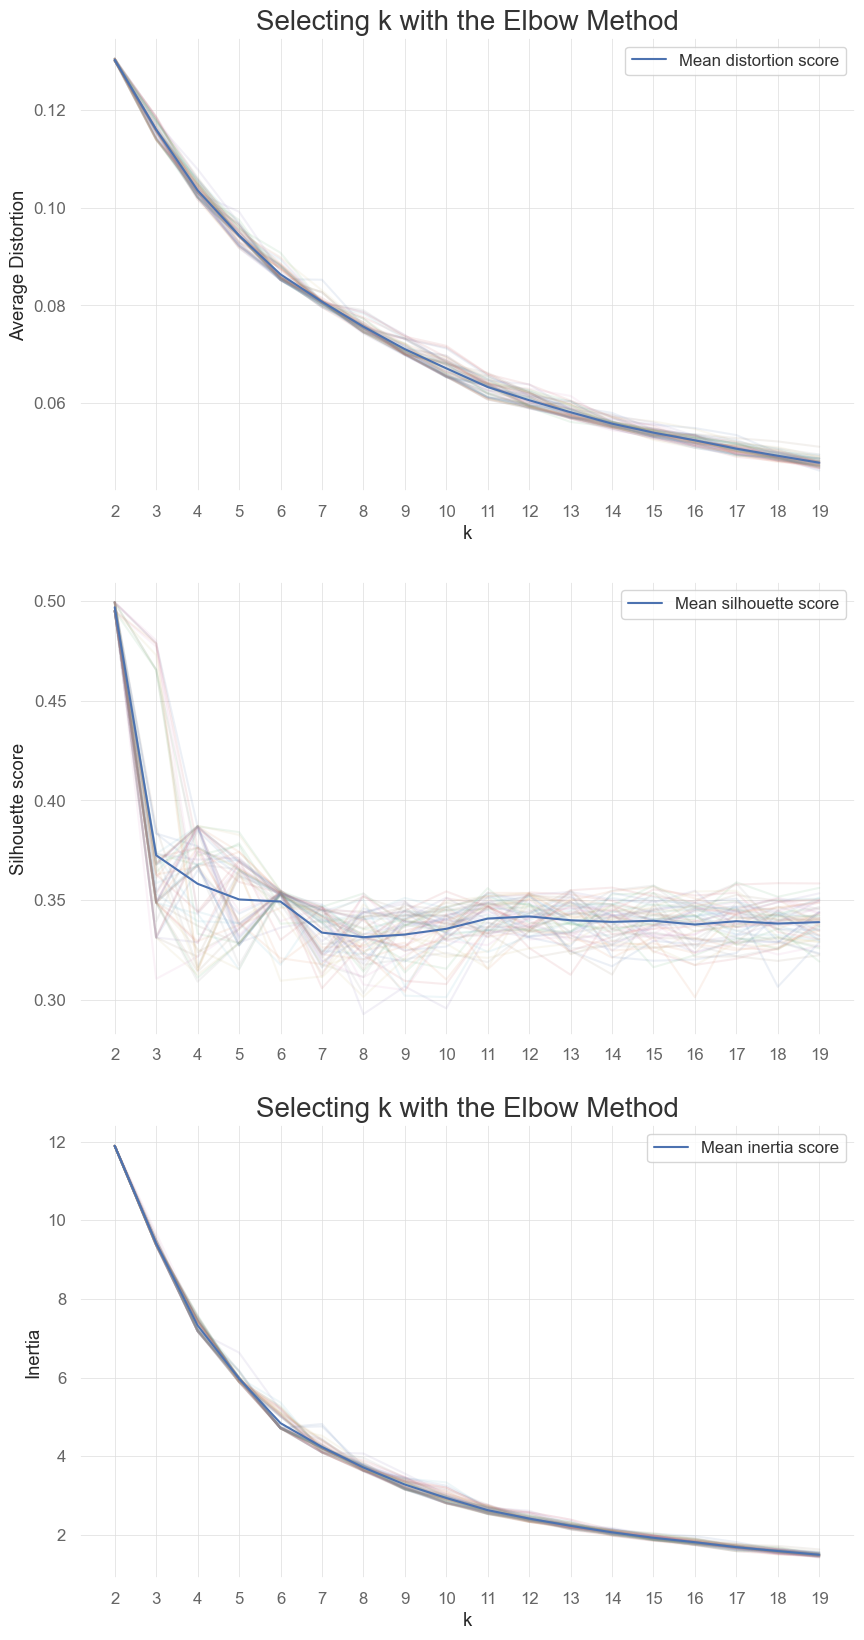

In [9]:
from analysis.data.plotting import plot_kmeans
plot_kmeans(runs, clusters, meanDistortions, sil_score, inertias)

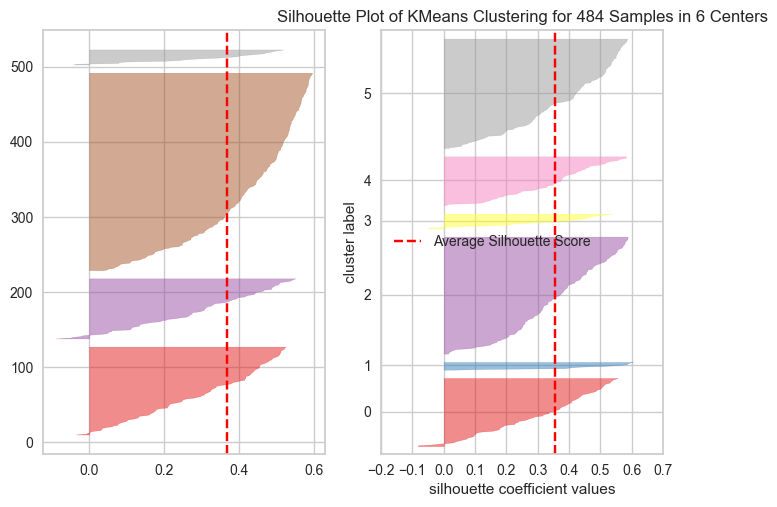

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 484 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
plt.subplot(1,2,1)
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(stock_data_clustering)
plt.subplot(1,2,2)
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))

visualizer.fit(stock_data_clustering)

visualizer.show()

In [25]:
N_SECTORS = 6
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=N_SECTORS, random_state=0)
kmeans.fit(stock_data_clustering)
final_dataframe["Sector"] = kmeans.labels_
final_dataframe.head()

,Ticker,Yavg_return,Yavg_volatility,beta,mkt_corr,Davg_span,Davg_volume,D_eSkewness,D_eVaR,D_eCVaR,D_eCurtosis,Sharpe_ratio,totalEsg,environmentScore,socialScore,governanceScore,industry,Sector
0,A,0.170254,0.290317,1.006775,0.707046,2.268208,1.961764e+06,-0.134994,-0.000283,-0.000401,4.334481,0.517552,11.36,1.19,6.23,3.93,Life Sciences Tools and Services,0
1,AAPL,0.309906,0.316770,1.238242,0.796984,2.378506,1.073273e+08,-0.036491,-0.000292,-0.000426,4.924361,0.915194,16.79,0.55,7.52,8.72,Technology,0
2,ABBV,0.159055,0.273195,0.657253,0.490510,2.003774,7.196053e+06,-0.845037,-0.000286,-0.000483,13.941117,0.508994,26.10,1.78,15.70,8.62,Biotechnology,0
3,ABT,0.155088,0.257788,0.853280,0.674865,1.733056,5.701730e+06,0.048214,-0.000290,-0.000434,6.096867,0.524026,22.21,1.81,13.84,6.56,Health Care,3
4,ACGL,0.204344,0.314158,0.979198,0.635494,0.905297,1.859299e+06,-0.321692,-0.000771,-0.001249,11.651915,0.586789,20.27,1.57,9.92,8.78,Insurance,0


In [26]:
cluster_profile = final_dataframe.groupby("Sector").mean(numeric_only=True)

# Add counts for the number of stocks in each cluster
cluster_profile["Count"] = final_dataframe.groupby("Sector")["Ticker"].count().values
cluster_profile["Sharpe_ratio"] = (cluster_profile["Yavg_return"]-0.02)/cluster_profile["Yavg_volatility"]

max_cols = ["beta", "D_eSkewness", "Yavg_return", "Sharpe_ratio", "Davg_volume"]
min_cols = ["beta", "Davg_span", "D_eCurtosis", "Yavg_volatility", "D_eVaR", "D_eCVaR", 
            "totalEsg", "environmentScore", "socialScore", "governanceScore"]

# Custom function for styling
def highlight_extremes(val, col_name):
    max_color = "background-color: green"
    min_color = "background-color: blue"
    
    if col_name in max_cols and val == cluster_profile[col_name].max():
        return max_color
    elif col_name in min_cols and val == cluster_profile[col_name].min():
        return min_color
    return ""

cluster_profile.style.apply(lambda x: [highlight_extremes(v, x.name) for v in x], axis=0)
# cluster_profile.style.highlight_max(color="green", axis=0, subset=["beta", "D_eSkewness",	"Yavg_return", "Sharpe_ratio", "Davg_volume"])
# cluster_profile.style.highlight_min(color="green", axis=0, subset=["beta", "Davg_span", "D_eCurtosis",	"Yavg_volatility", "D_eVaR", "D_eCVaR", "totalEsg",	"environmentScore",	"socialScore",	"governanceScore"])

,Yavg_return,Yavg_volatility,beta,mkt_corr,Davg_span,Davg_volume,D_eSkewness,D_eVaR,D_eCVaR,D_eCurtosis,Sharpe_ratio,totalEsg,environmentScore,socialScore,governanceScore,Count
Sector,,,,,,,,,,,,,,,,
0,0.190472,0.308862,0.984507,0.650862,4.807275,4378157.259635,-0.055286,-0.000386,-0.000608,10.895517,0.551937,19.041299,4.807922,8.762208,5.470779,156
1,0.169021,0.587566,1.465408,0.512221,2.237217,8449393.323567,-0.145839,-0.001601,-0.002787,19.960024,0.253625,26.826842,10.515263,10.393684,5.918421,19
2,0.085718,0.390491,1.143365,0.599098,2.005677,6490961.659236,-0.055018,-0.000967,-0.001530,13.379843,0.168297,19.824494,4.794607,8.884607,6.145169,89
3,0.093587,0.269496,0.753590,0.566809,2.087484,4031858.153579,-0.227471,-0.000451,-0.000725,12.297046,0.273056,21.430211,6.807958,9.369577,5.252746,144
4,0.288547,0.413376,1.260212,0.624482,4.462717,4586796.498201,0.034763,-0.000531,-0.000826,10.922461,0.649645,20.603077,6.081077,8.878154,5.644000,65
5,0.504261,0.544971,1.421206,0.546475,3.604462,66299100.174709,0.414555,-0.001841,-0.002842,8.131975,0.888600,20.021818,5.269000,8.986000,5.723000,11


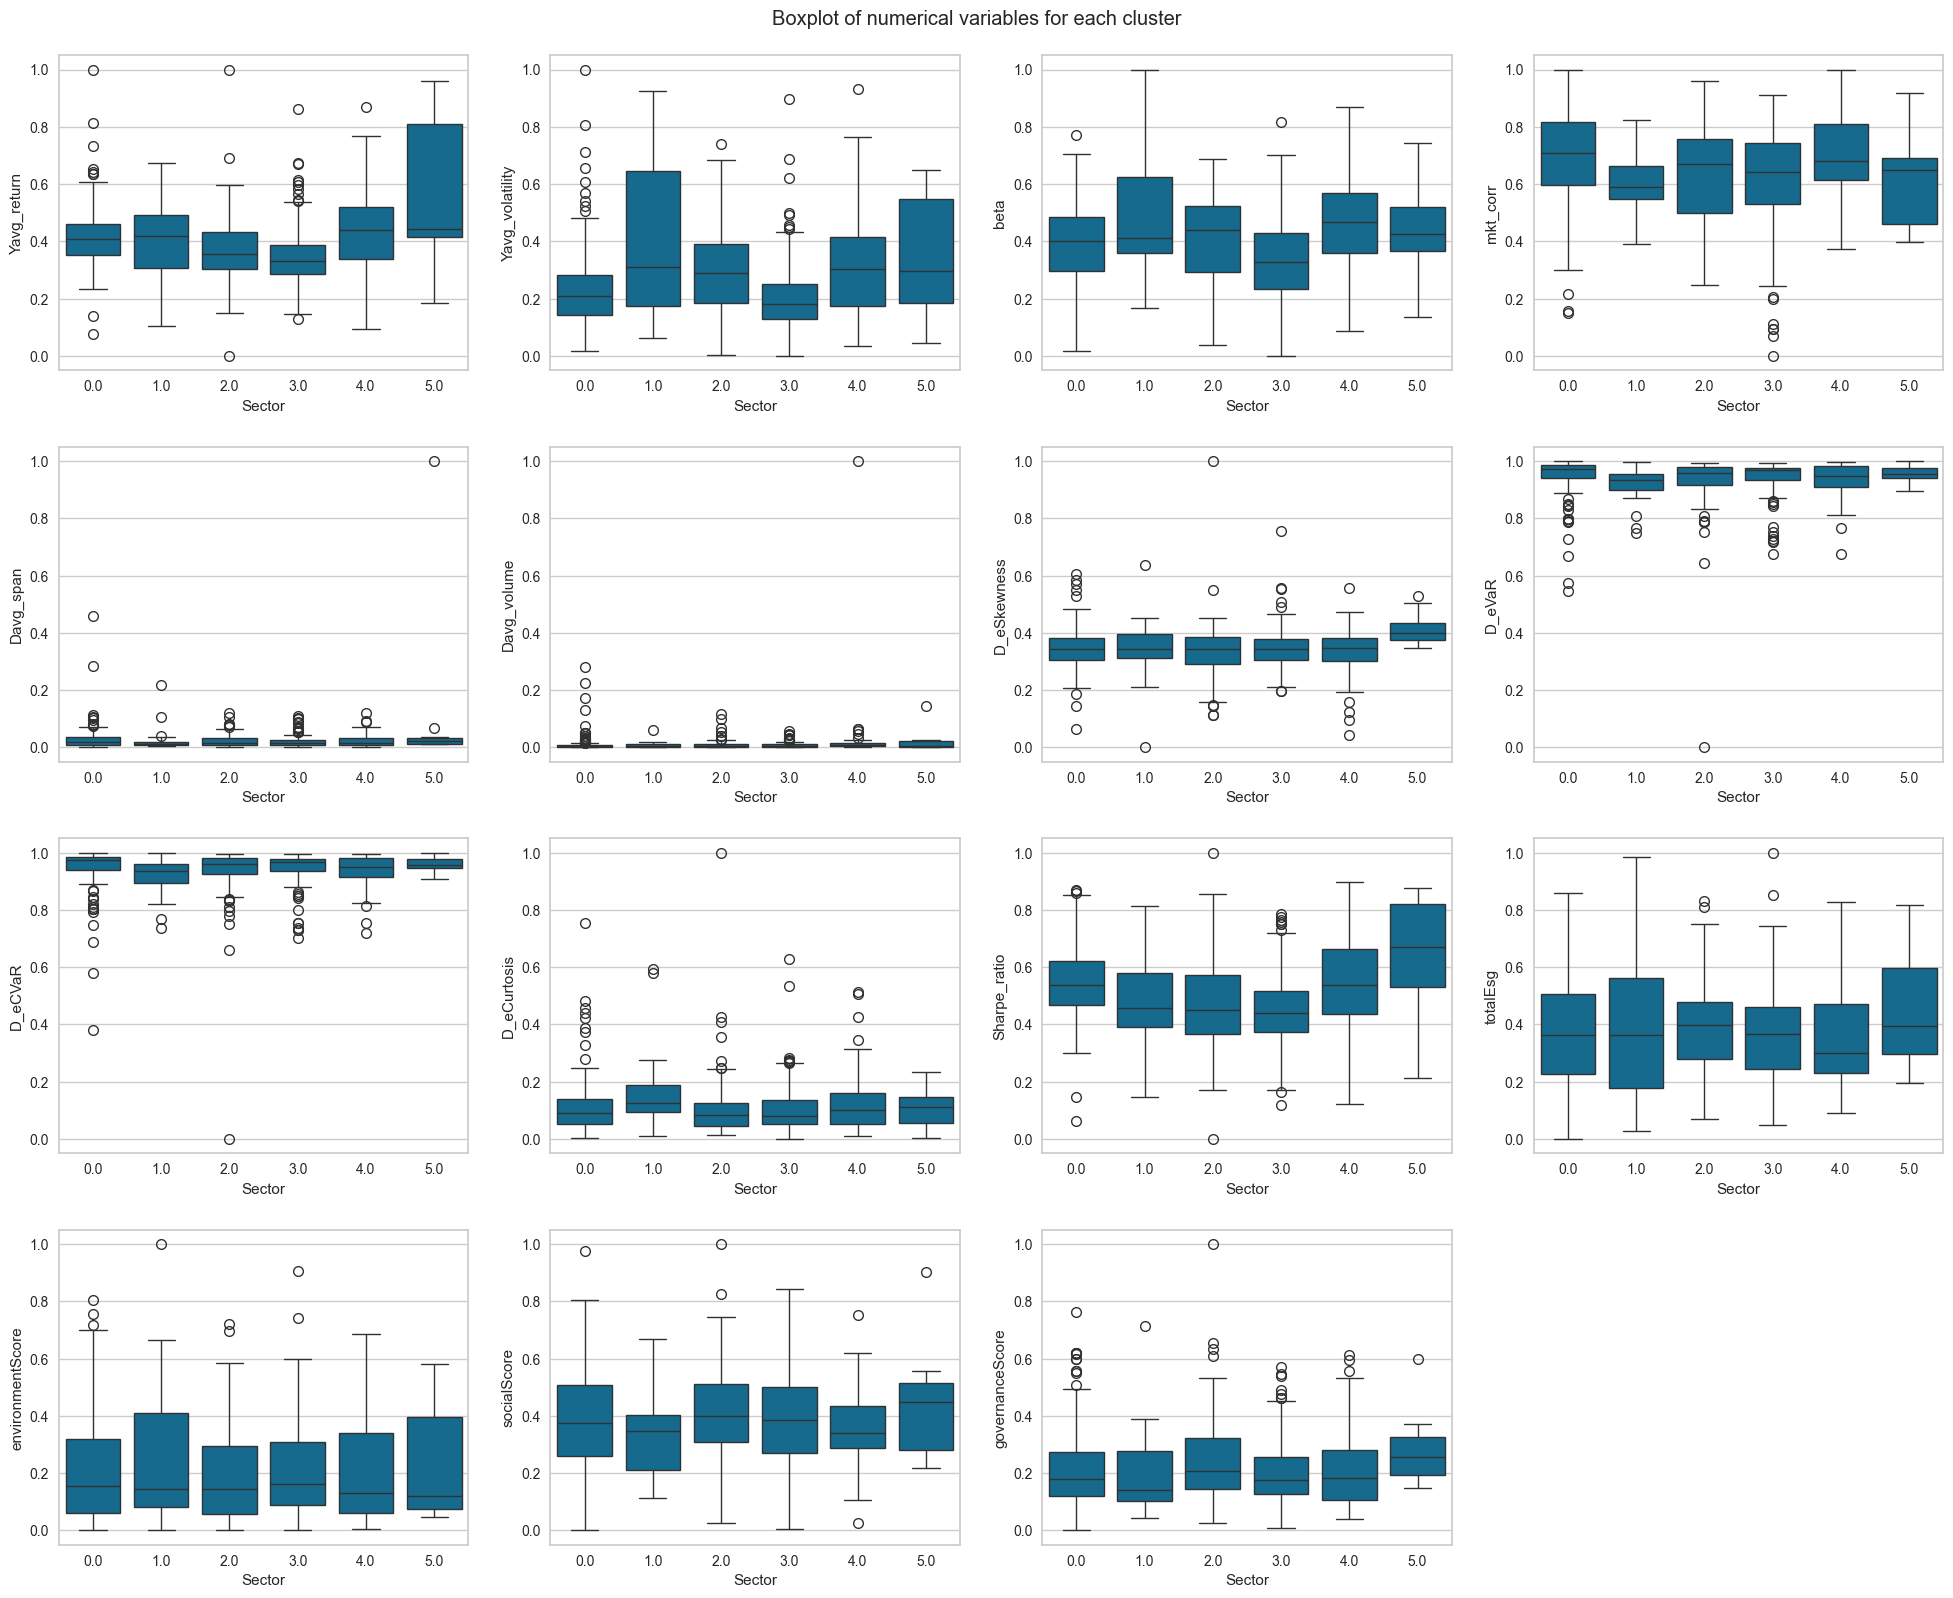

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaled_data = pd.DataFrame()
for attr in final_dataframe.select_dtypes(include=["float64", "int64"]).columns:
    scaler = MinMaxScaler()
    scaled_data[attr] = scaler.fit_transform(final_dataframe[attr].values.reshape(-1, 1)).flatten()
scaled_data["Sector"] = final_dataframe["Sector"]
plt.figure(figsize=(20, 20))
import seaborn as sns
plt.suptitle("Boxplot of numerical variables for each cluster")
i = 1
for i, variable in enumerate(final_dataframe):
  if variable not in ["Ticker", "industry", "Sector"]:
    plt.subplot(5, 4, i)
    sns.boxplot(data=scaled_data, x="Sector", y=variable)
    i += 1

plt.tight_layout(pad=2.0)

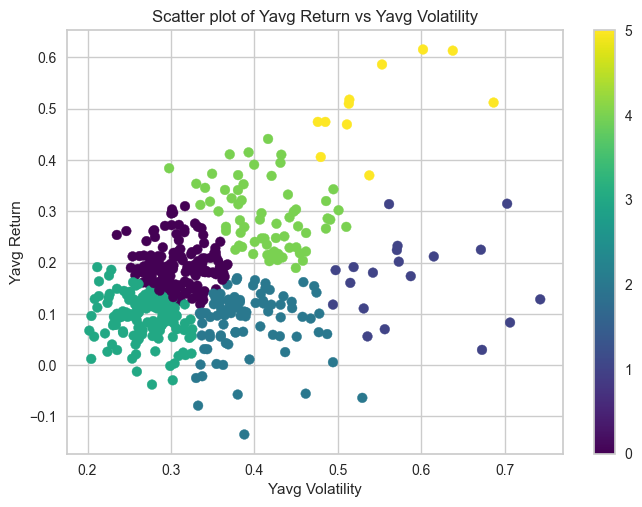

In [14]:
plt.scatter(
    final_dataframe["Yavg_volatility"], 
    final_dataframe["Yavg_return"], 
    c=final_dataframe["Sector"],  # Use c for color mapping
    cmap='viridis',  # Optional: Choose a colormap
    
)

# Add labels and title
plt.xlabel("Yavg Volatility")
plt.ylabel("Yavg Return")
plt.title("Scatter plot of Yavg Return vs Yavg Volatility")
plt.colorbar()
# Show the plot
plt.show()

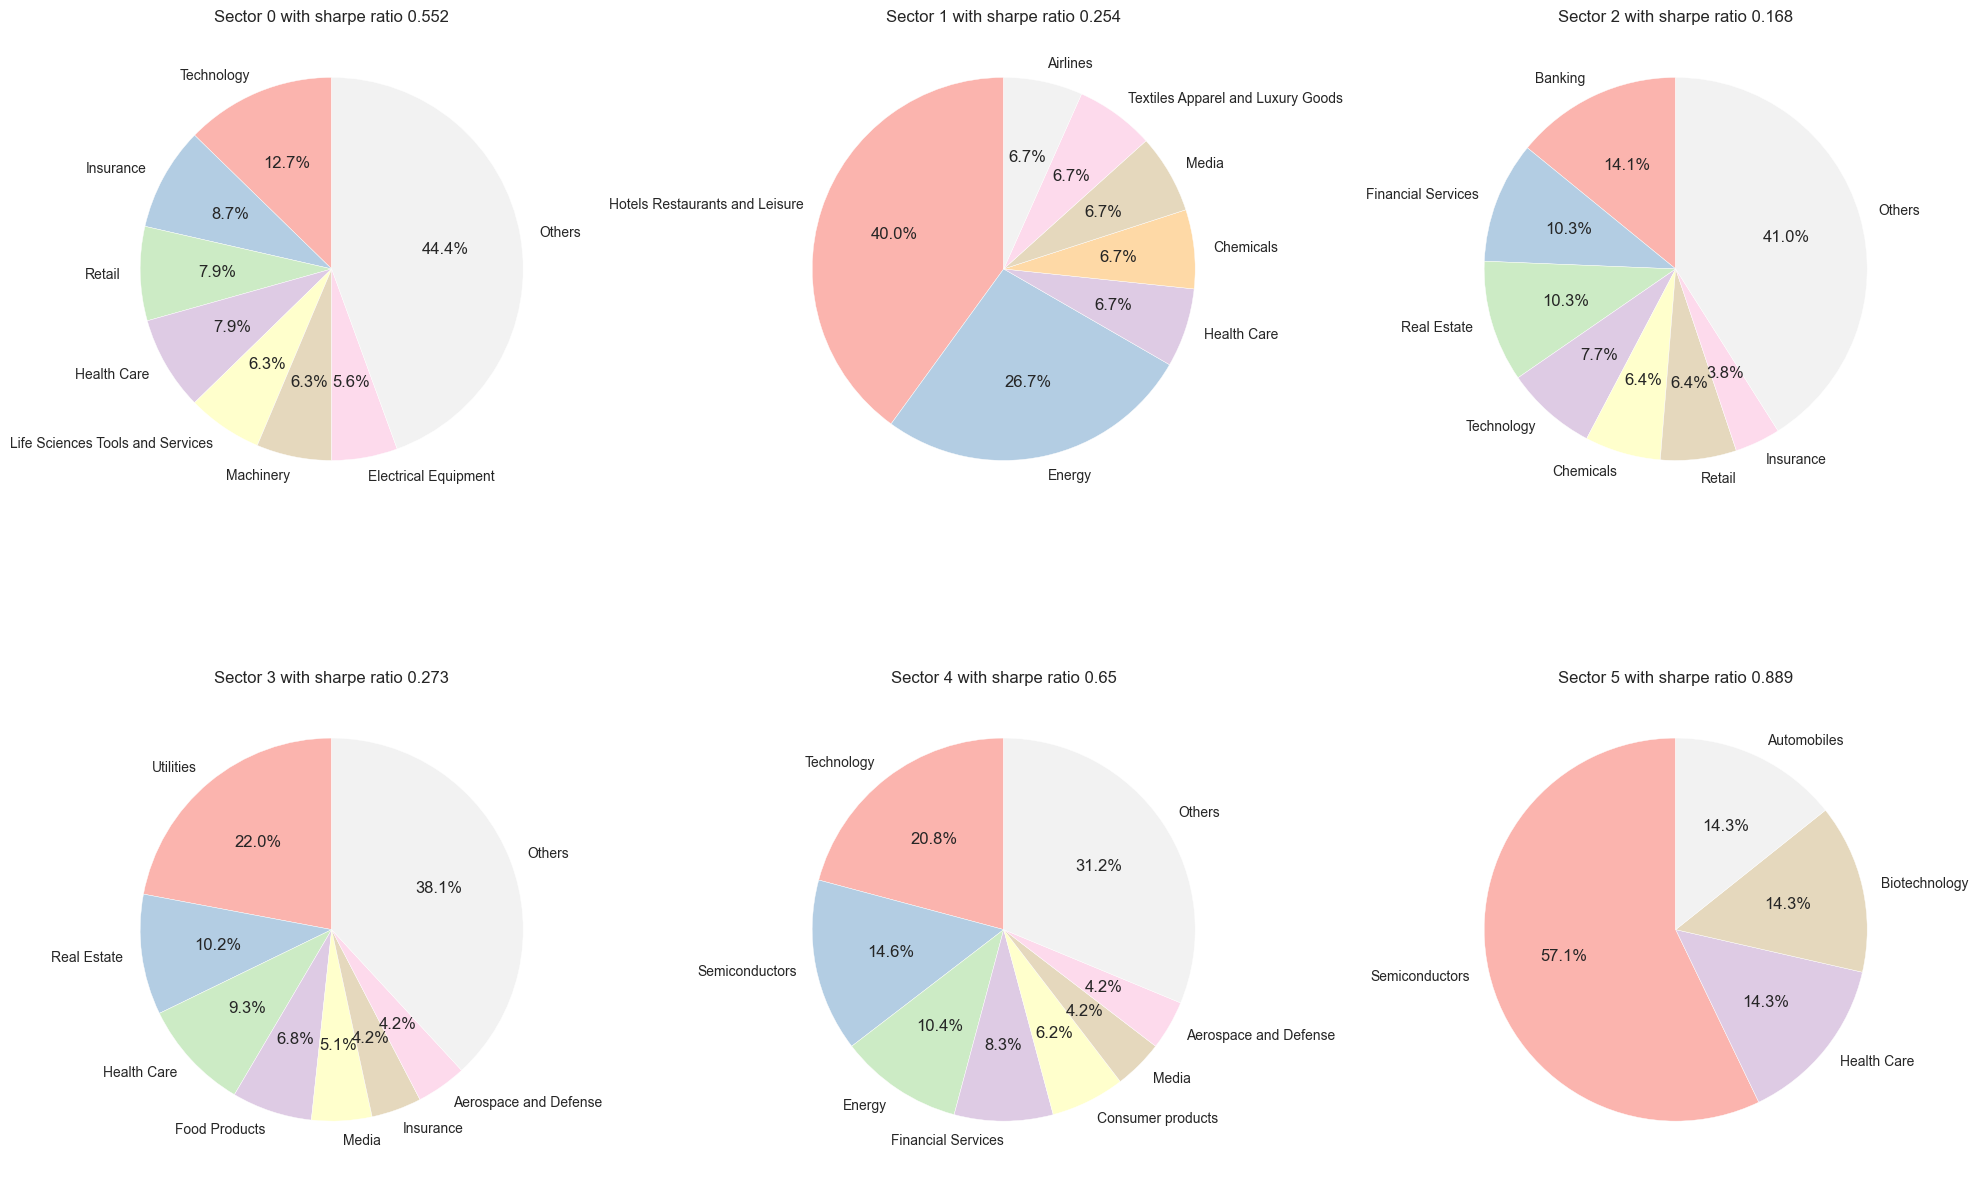

In [15]:
MAX_LABELS = 7
from analysis.data.plotting import plot_cluster_industry
plot_cluster_industry(MAX_LABELS, final_dataframe, cluster_profile)


In [19]:
from analysis.data.dataframe_creation import create_portfolio_clustered
portfolio_ret, asset_ret = create_portfolio_clustered(sd, ed, final_dataframe, list(final_dataframe["Ticker"]), w = "uniform")


[*********************100%***********************]  484 of 484 completed


Null values: False
Null values: False
Cluster Portfolios uniformly built among assets


In [15]:
benchmark = yf.download(tickers="SPY", start=sd, end=ed, auto_adjust=True)["Close"]

[*********************100%***********************]  1 of 1 completed


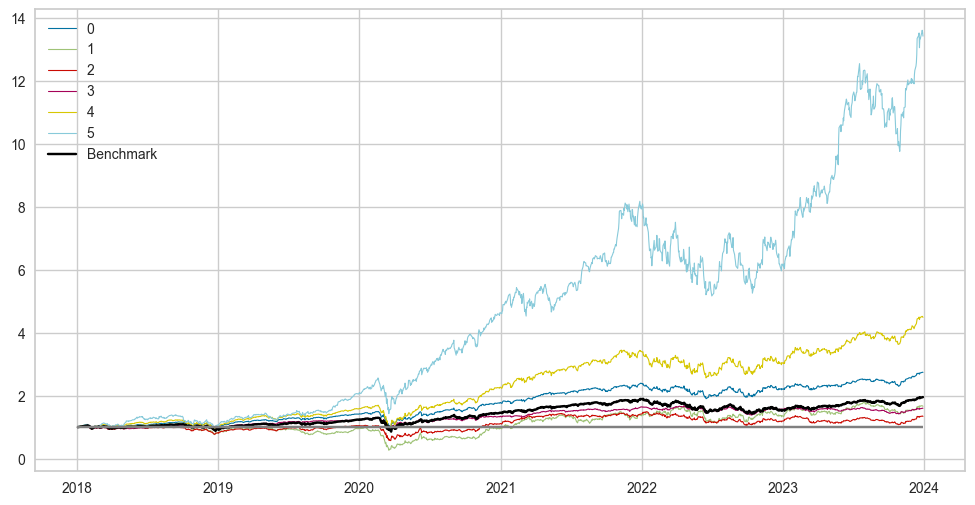

In [21]:
import analysis.data.plotting as plotting
importlib.reload(plotting)
from analysis.data.plotting import portfolio_evolution_time
portfolio_evolution_time(portfolio_ret.reset_index(), benchmark.reset_index())

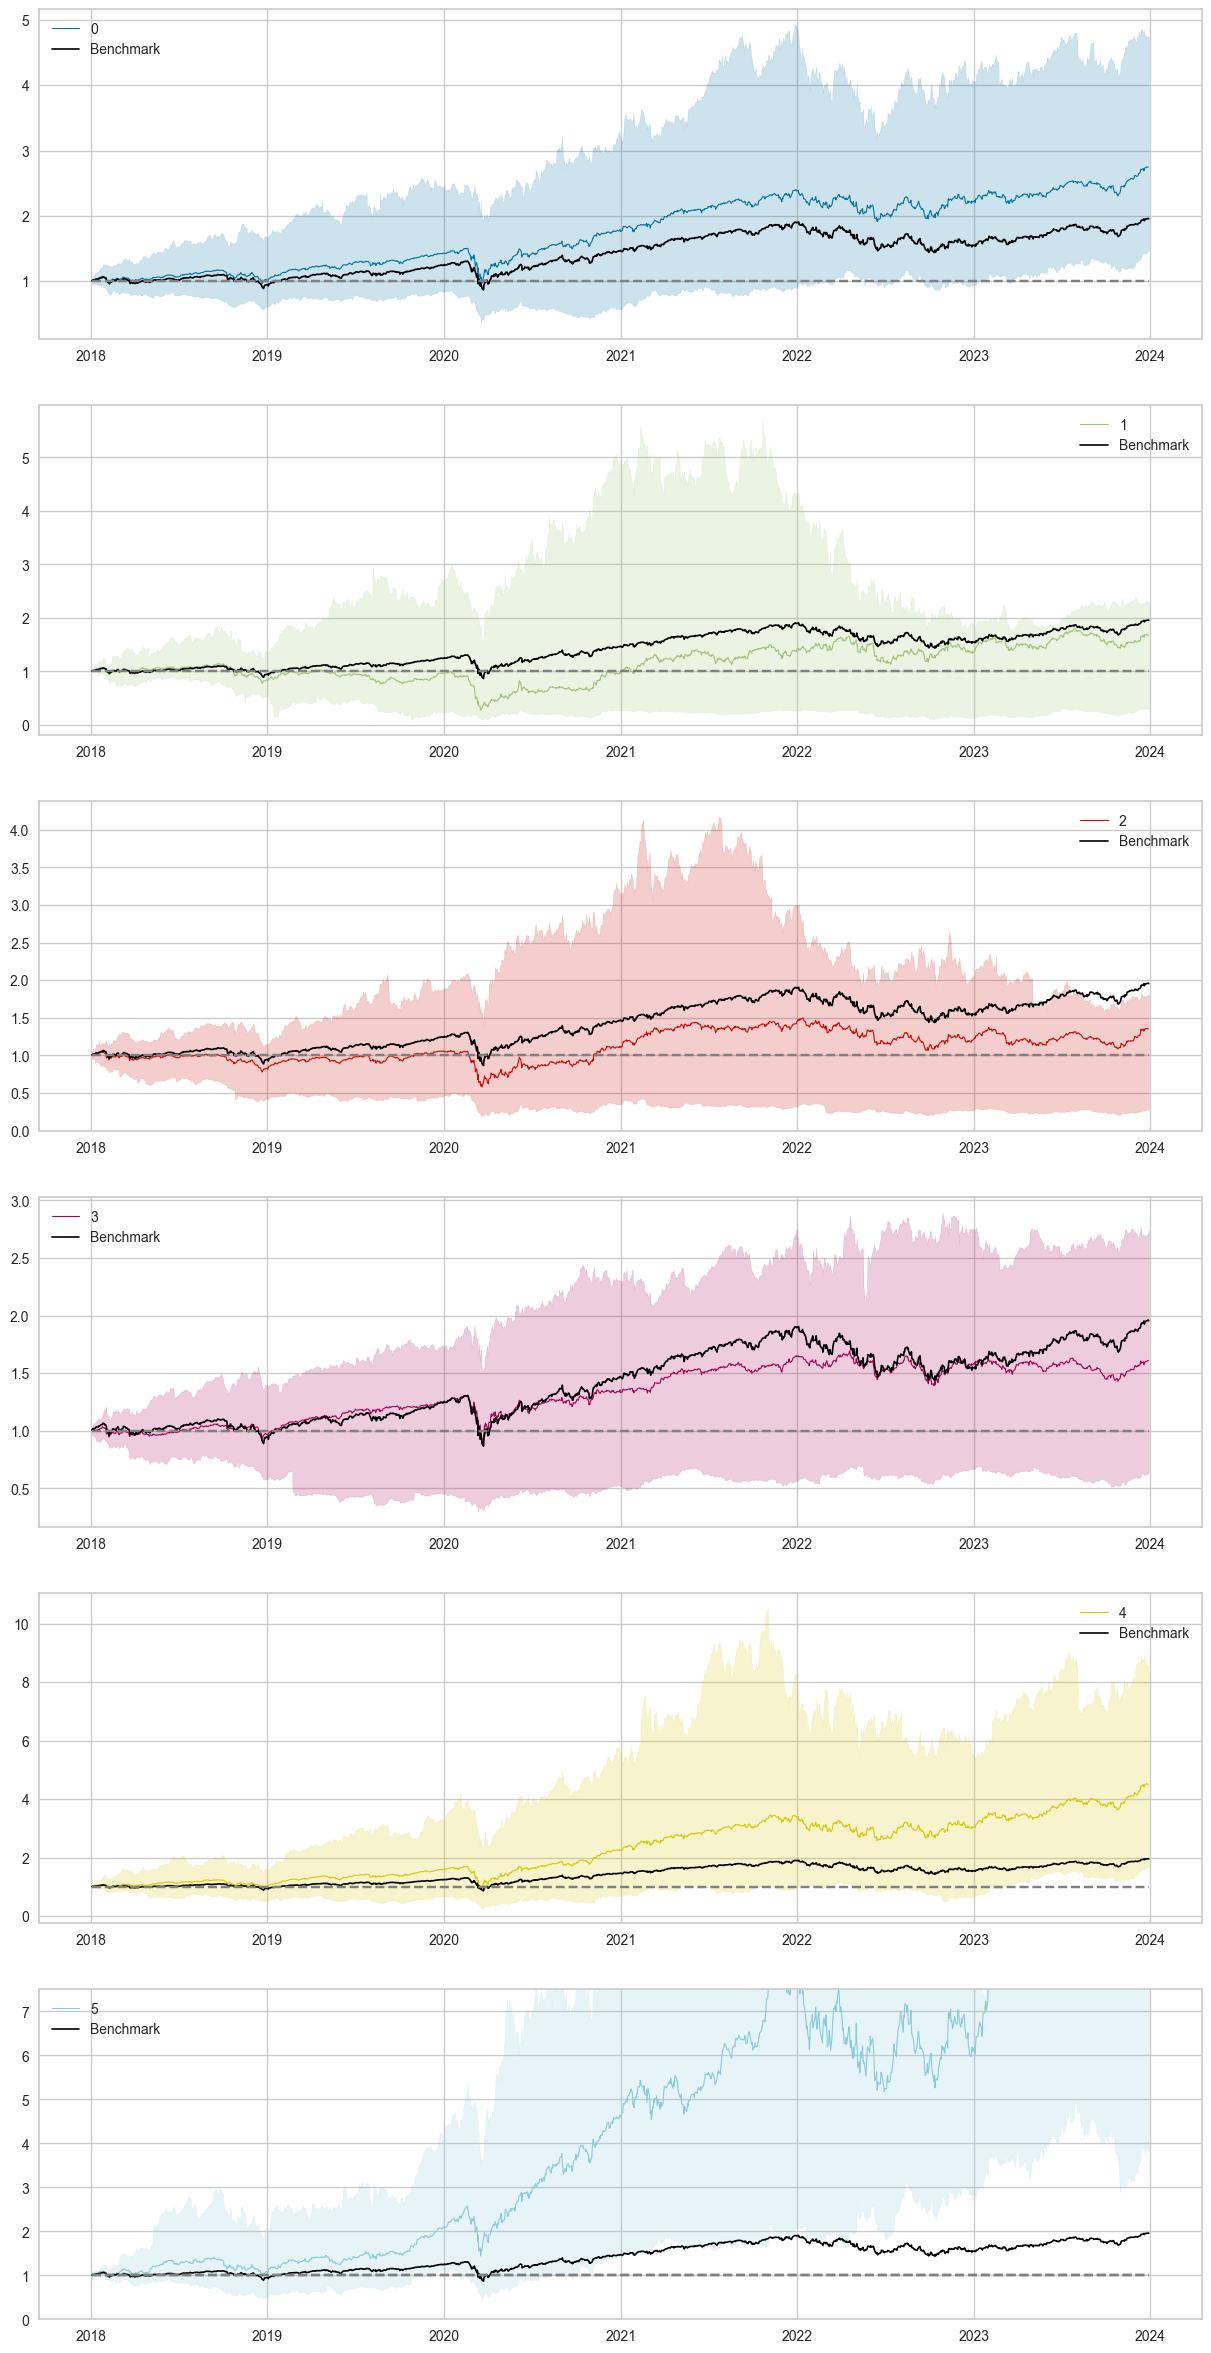

In [22]:
from analysis.data.plotting import portfolio_span
portfolio_span(asset_ret, portfolio_ret, final_dataframe, benchmark, N_SECTORS)

In [22]:
from analysis.data.dataframe_creation import create_portfolio_clustered
sd_test = ed
ed_test = "2025-01-10"
portfolio_ret_t, asset_ret_t = create_portfolio_clustered(sd_test, ed_test, final_dataframe,
                                                           list(final_dataframe["Ticker"]), w="sharpe")

[*********************100%***********************]  484 of 484 completed


Null values: False
Null values: False
Cluster Portfolios based on sharpe ratio


In [23]:
benchmark_t = yf.download(tickers="SPY", start=sd_test, end=ed_test, auto_adjust=True)["Close"]

[*********************100%***********************]  1 of 1 completed


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2024-01-03  2024-01-03
End Period                 2025-01-08  2025-01-08
Risk-Free Rate             2.0%        2.0%
Time in Market             100.0%      100.0%

Cumulative Return          26.49%      26.32%
CAGR﹪                     26.01%      25.84%

Sharpe                     1.03        1.73
Prob. Sharpe Ratio         78.99%      93.75%
Smart Sharpe               1.02        1.71
Sortino                    1.53        2.5
Smart Sortino              1.51        2.47
Sortino/√2                 1.08        1.77
Smart Sortino/√2           1.07        1.75
Omega                      1.18        1.18

Max Drawdown               -15.58%     -8.41%
Longest DD Days            138         64
Volatility (ann.)          23.04%      12.58%
R^2                        0.72        0.72
Information Ratio          0.01        0.01
Calmar                     1.67        3.

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2024-07-17,2024-08-07,2024-12-02,138,-15.582833,-14.950869
2,2024-03-08,2024-04-19,2024-06-17,101,-11.456567,-10.780740
3,2024-12-09,2025-01-02,2025-01-08,30,-7.722753,-7.440913
4,2024-02-16,2024-02-21,2024-02-22,6,-3.879862,-3.165605
5,2024-06-20,2024-07-01,2024-07-05,15,-2.516038,-2.386423


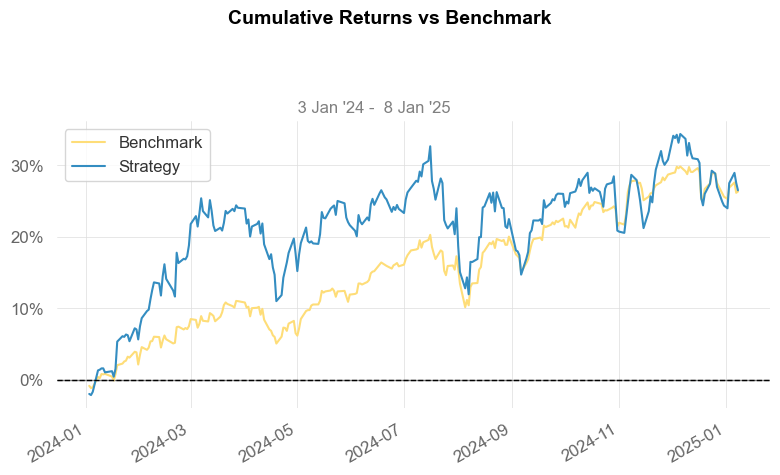

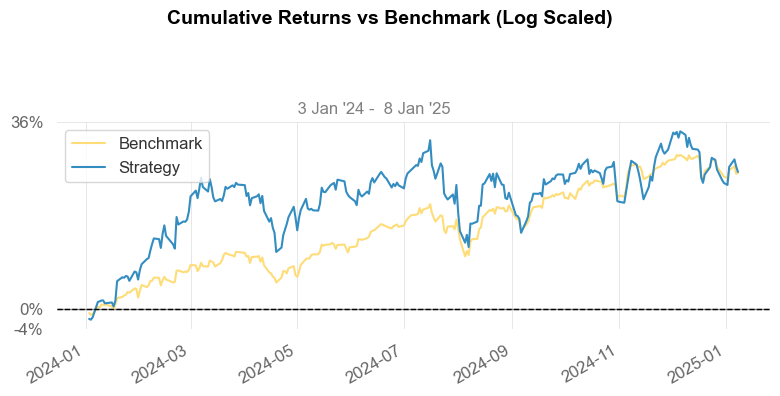

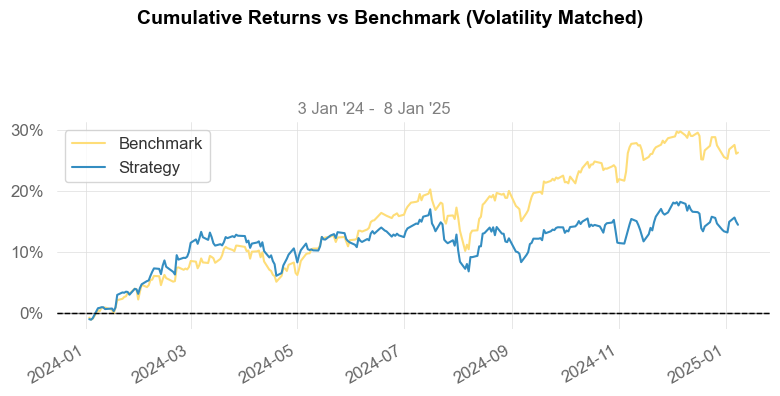

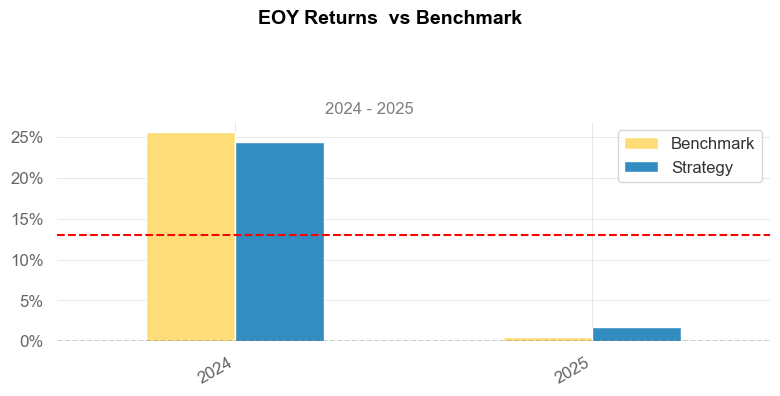

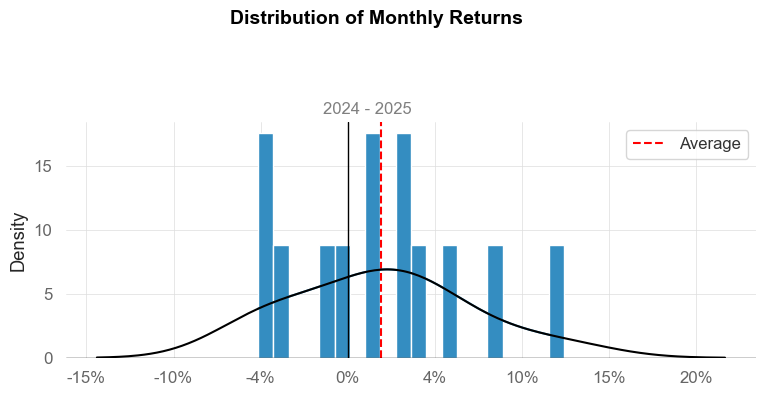

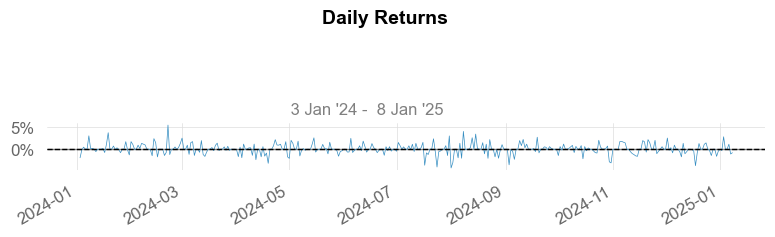

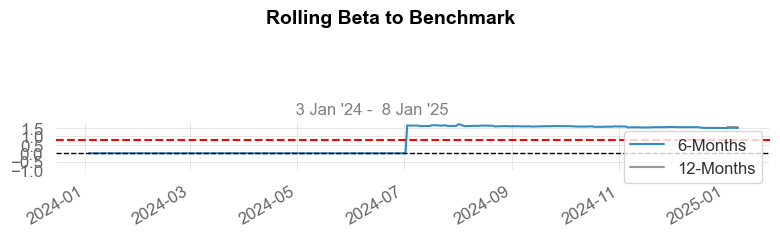

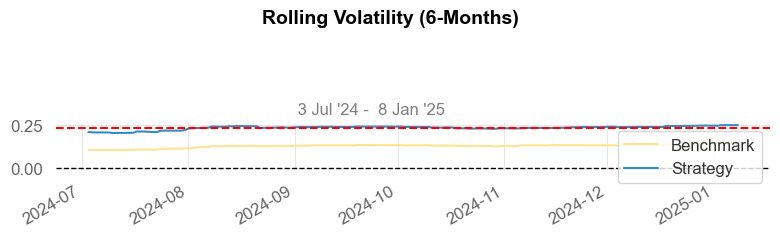

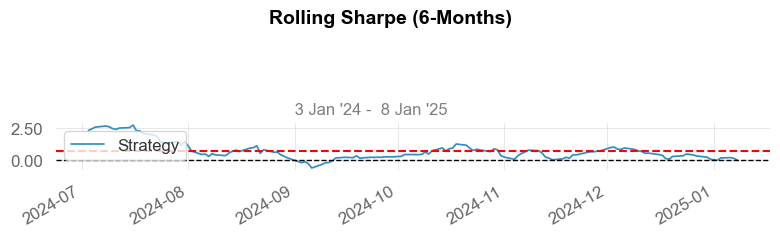

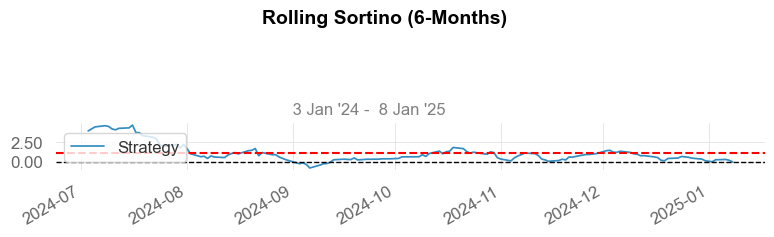

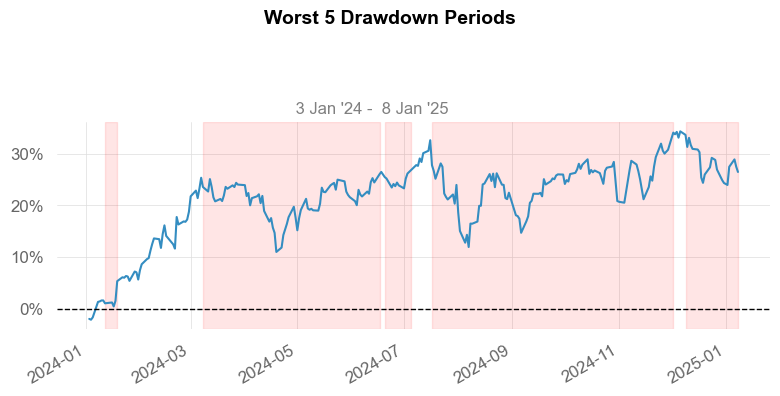

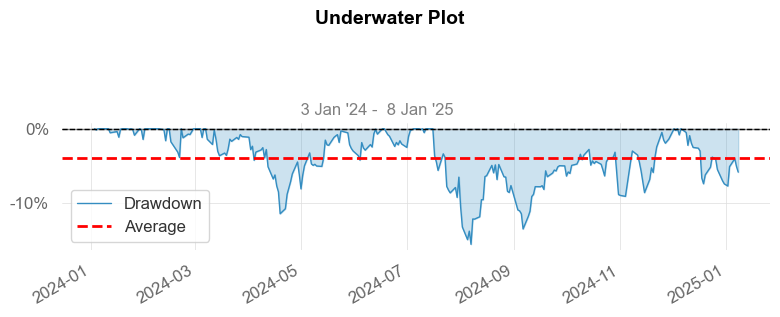

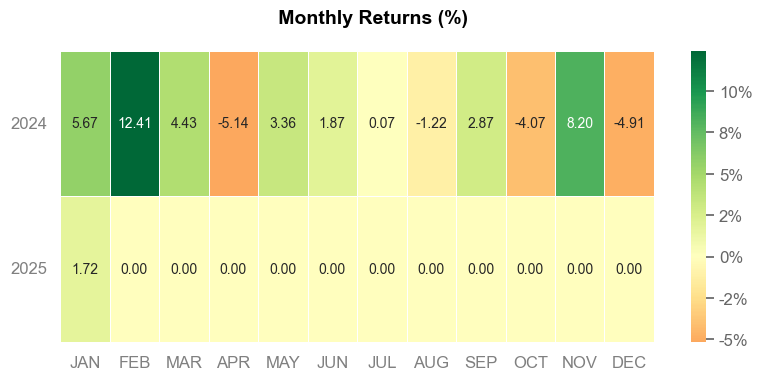

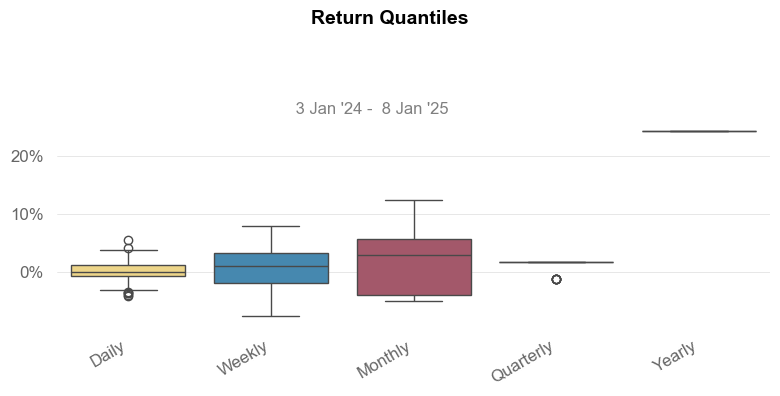

In [30]:
import quantstats as qs
def weights(ratios, cluster, pow, thresh):
    w = np.array(ratios["Sharpe_ratio"] > thresh)*ratios["Sharpe_ratio"]
    ratios["weights"] = np.power(w, pow)
    ratios["weights"] = ratios["weights"]/np.sum(ratios["weights"])
    return ratios.loc[ratios["Sector"] == cluster, "weights"]

returns = np.zeros(len(portfolio_ret_t))
cp = cluster_profile.reset_index()
for i in portfolio_ret_t.columns:
        weight = weights(cp[["Sector", "Sharpe_ratio"]], i, 2, 0.3).values[0]
        returns += weight*portfolio_ret_t[i] 
        
portfolio_performance = pd.DataFrame(returns).reset_index()
portfolio_performance["Date"] = pd.to_datetime(portfolio_performance["Date"])
portfolio_performance.set_index("Date", inplace=True)
portfolio_performance.columns = ["Returns"]

qs.reports.full(
    portfolio_performance["Returns"],
    benchmark=benchmark_t.pct_change().dropna(),
    rf=0.02,
)

In [49]:
print(qs.__version__)

0.0.64


In [34]:

print("Pandas Version:", pd.__version__)
print("Quantstats Version:", qs.__version__)

Pandas Version: 1.5.3
Quantstats Version: 0.0.64
